In [4]:
import os
import csv
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import cm
import matplotlib.pyplot as plt

In [34]:
plt.style.use('seaborn-deep')
matplotlib.rcParams['axes.labelsize'] = 15
matplotlib.rcParams['xtick.labelsize'] = 15
matplotlib.rcParams['ytick.labelsize'] = 15
matplotlib.rcParams['text.color'] = 'k'

In [6]:
filename = "./data/Chicago_Crimes_2001_2018.csv"

 Display Time Series of data...
Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year')


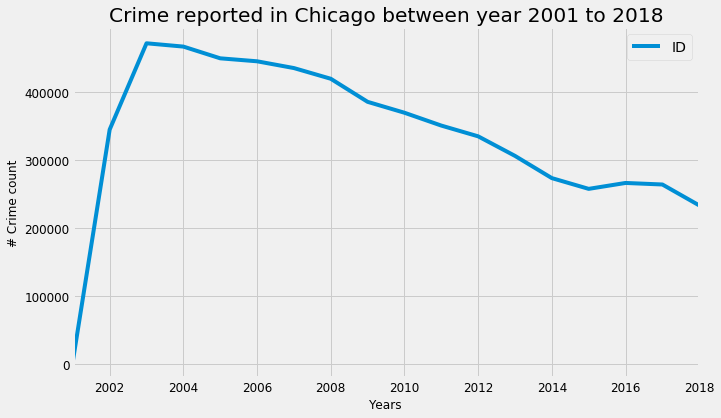

In [21]:
# Display crime by time series graph between 2001 to 2018.
print("1. Displaying crime trends in Chicago from year 2001 to 2018 [Time Series]...")
filename = "./data/Chicago_Crimes_2001_2018.csv"
filename_timeseries = "./data/Chicago_Crimes_2001_2018_timeseries.csv"
tp1 = pd.read_csv(filename, encoding='utf8', engine='python', iterator=True, chunksize=10000)   # Read CSV in Chunksize to avoid low memory
data = pd.concat(tp1, ignore_index=True)                                         # Concatenate the read dataframes in Chunks
data_year = data.groupby(['Year'])[['ID']].count()
data_year.to_csv(filename_timeseries)
tp2 = pd.read_csv(filename_timeseries, low_memory=False, iterator=True, chunksize=10000)
data_year = pd.concat(tp2, ignore_index=True)   
data_year = data_year.set_index('Year')
#print(data_year.index)
data_year.plot(figsize=(10, 6))
plt.title('Crime reported in Chicago between year 2001 to 2018')
plt.ylabel("# Crime count");
plt.xlabel("Years");
plt.legend();
plt.show()

2. Displaying frequencies of each crime types in Chicago from year 2001 to 2018 


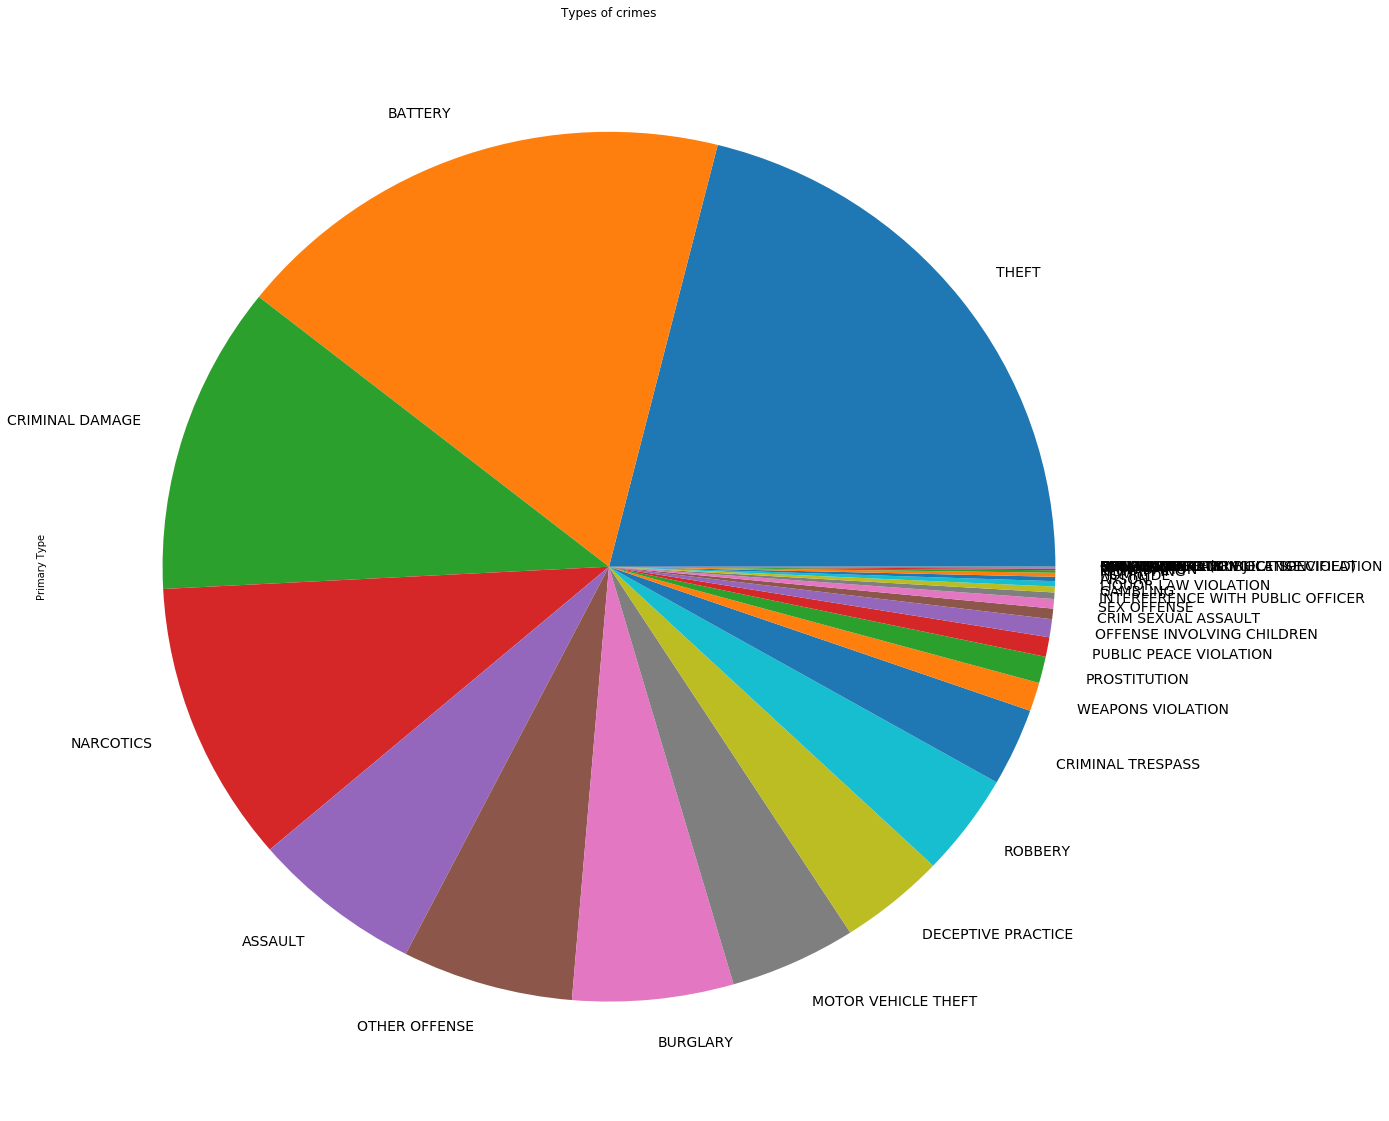

In [7]:
# Display crime count pie-chart (count between 2001 - Current)
print("2. Displaying frequencies of each crime types in Chicago from year 2001 to 2018 ")
tp3 = pd.read_csv(filename, encoding='utf8', engine='python', iterator=True, chunksize=10000)   # Read CSV in Chunksize to avoid low memory
input_data = pd.concat(tp3, ignore_index=True)                                         # Concatenate the read dataframes in Chunks
df = pd.DataFrame(input_data)
cs = cm.Set1(np.arange(40) / 40.)
plt.figure(figsize=(20, 20))
df['Primary Type'].value_counts(sort=True).plot.pie(title='Types of crimes', figsize=(20, 20), fontsize=14)
plt.show()

3. Displaying yearly treds of Domestic Violence' in Chicago from year 2001 to 2018


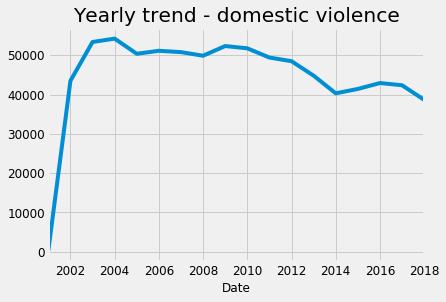

3. Displaying monthy treds of Domestic Violence' in Chicago from year 2001 to 2018


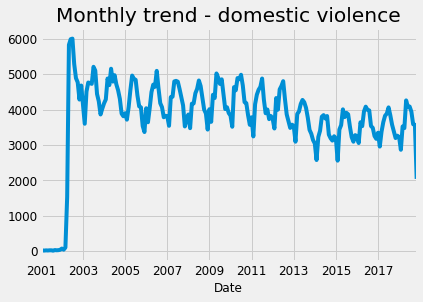

In [25]:
# Draw graph for domestic violence crime. Inference:
print("3. Displaying yearly treds of Domestic Violence' in Chicago from year 2001 to 2018")
input_data = pd.read_csv(filename, index_col='Date', encoding='utf8', engine='python')
#input_data = pd.concat(tp4, ignore_index=True) 
input_data.index = pd.to_datetime(input_data.index)
domestic_crime_yearly = input_data[input_data['Domestic'] == True]['Domestic']
plt.subplot()
# Yearly trend - domestic violence
domestic_crime_yearly.resample('A').sum().plot()
plt.title('Yearly trend - domestic violence')
plt.show()
print("3. Displaying monthy treds of Domestic Violence' in Chicago from year 2001 to 2018")
# Monthly trend - domestic violence
domestic_crime_yearly.resample('M').sum().plot()
plt.title('Monthly trend - domestic violence')
plt.show()

6. Displaying Community Area with highest crime in Chicago from year 2001 to 2018


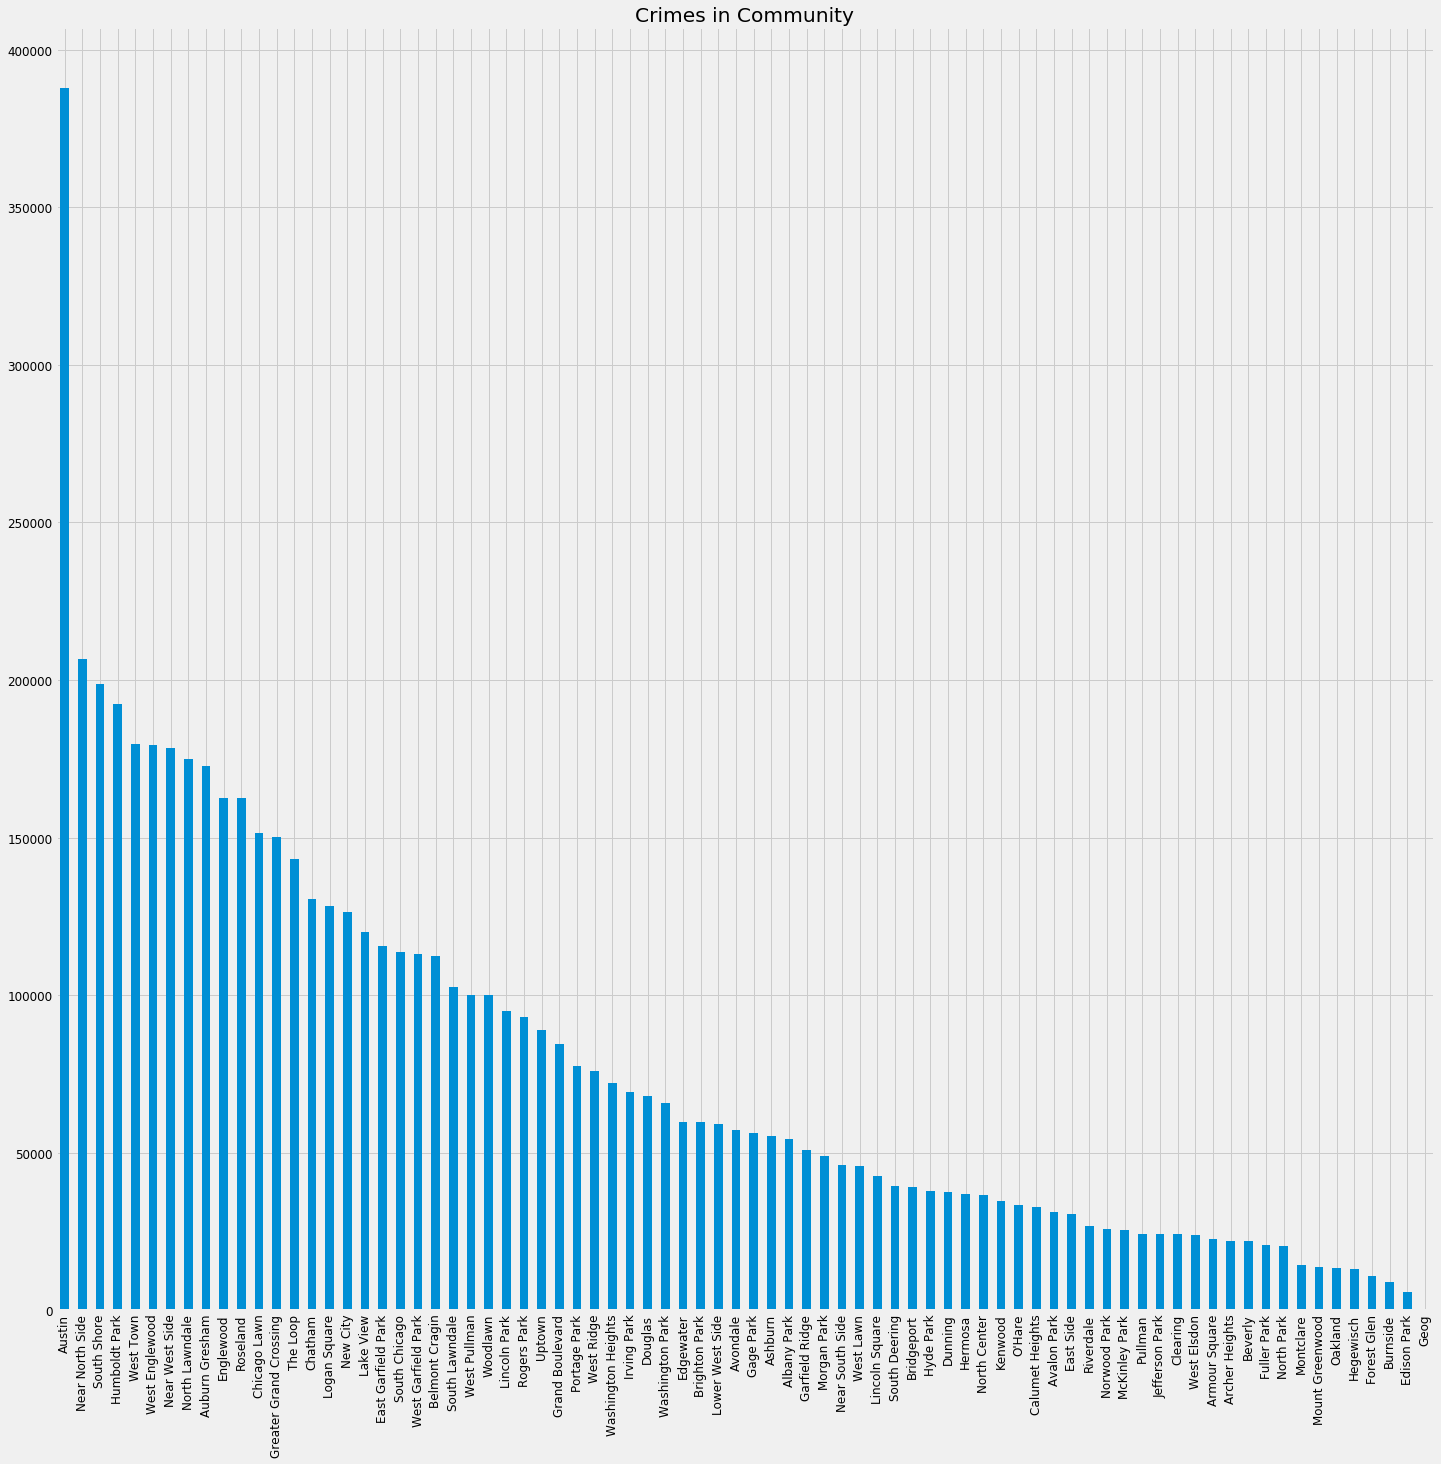

In [31]:
# Draw graph for showing crime count by Chicago community names
print("6. Displaying Community Area with highest crime in Chicago from year 2001 to 2018")
tp5 = pd.read_csv(filename, header=0, iterator=True, chunksize=10000)
input_data = pd.concat(tp5, ignore_index=True)
data_frame = pd.DataFrame(input_data)
cs = cm.Set1(np.arange(40) / 40.)
plt.figure(figsize=(22, 22))
data_frame['Community Area Name'].value_counts(sort=True).plot.bar(title='Crimes in Community', figsize=(22, 22), fontsize=12)
plt.show()

7. Displaying location where crime occured in Chicago from year 2001 to 2018


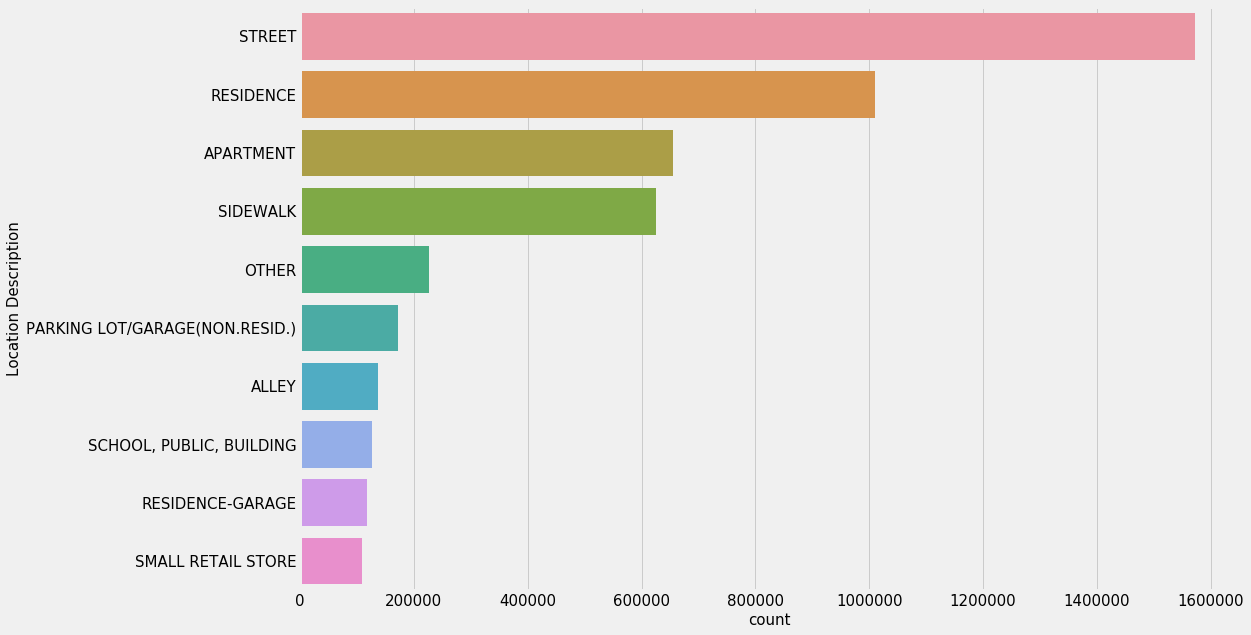

In [30]:
# Generate plot for crime location (home, road, mall etc)
print("7. Displaying location where crime occured in Chicago from year 2001 to 2018")
tp = pd.read_csv(filename, header=0, iterator=True, chunksize=10000)
input_data = pd.concat(tp, ignore_index=True)
plt.figure(figsize=(15, 10))
sn.countplot(y='Location Description', data=input_data, order=input_data['Location Description'].value_counts().iloc[:10].index)
plt.show()

8. Displaying Arrests made on yearly basis and monthly basis for crimes in Chicago from year 2001 to 2018


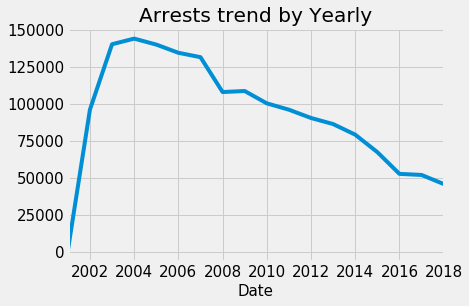

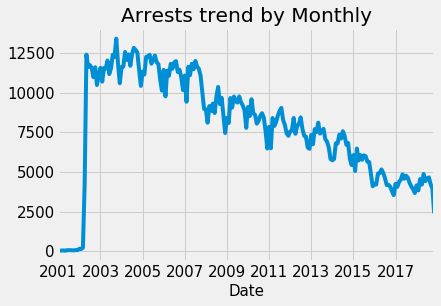

In [32]:
# Generate plot for Arrests made on yearly basis and monthly basis
print("8. Displaying Arrests made on yearly basis and monthly basis for crimes in Chicago from year 2001 to 2018")
input_data = pd.read_csv(filename, index_col='Date')
input_data.index = pd.to_datetime(input_data.index)
## Arrests per year
arrest_count_yearly = input_data[input_data['Arrest'] == True]['Arrest']
plt.subplot()
# Get Yearly arrest trend
arrest_count_yearly.resample('A').sum().plot()
plt.title('Arrests trend by Yearly')
plt.show()
# Get Monthly arrest trend
arrest_count_yearly.resample('M').sum().plot()
plt.title('Arrests trend by Monthly')
plt.show()

9. Displaying location where crime occured in Chicago from year 2001 to 2018


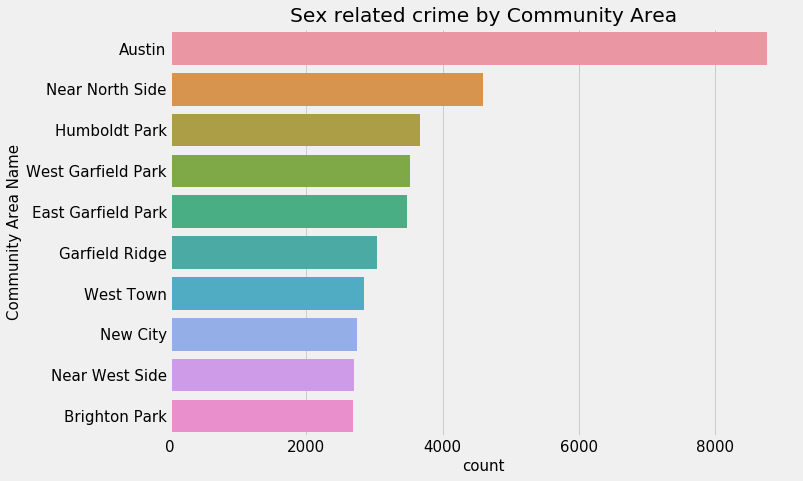

In [33]:
# Sex related crime by Community Area in Chicago. Inference: The Area(s) not safe for Women and Children.
print("9. Sex related crime by Community Area in Chicago from year 2001 to 2018")
filename_sex_related_crime = "./data/data_sex_related_crime_Chicago_2001_2018.csv"
tp = pd.read_csv(filename, index_col='Date', header=0, parse_dates=['Date'], infer_datetime_format=True, iterator=True, chunksize=10000)
input_data = pd.concat(tp, ignore_index=True)
df_sex_crime = pd.DataFrame(input_data[input_data['FBI Code'].isin(['2', '16', '17'])])
df_sex_crime.index = pd.to_datetime(df_sex_crime.index)
df_sex_crime.to_csv(filename_sex_related_crime)
plt.figure(figsize=(10, 7))
plt.title('Sex related crime by Community Area')
sn.countplot(y='Community Area Name', data=df_sex_crime, order=df_sex_crime['Community Area Name'].value_counts().iloc[:10].index)
plt.show()